# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ilham Rafiedhia P.
- **Email:** ilhamrafiedhia18@gmail.com
- **ID Dicoding:** ilhamrafii

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara musim dan sewa sepeda harian ?
- Bagaimana hubungan antara cuaca (weathersit) dan jumlah sewa sepeda harian?
- Bagaimana pola penyewaan sepeda berdasarkan waktu(bulan) ?
- Bagaimana pola penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)?

## Import Semua Packages/Library yang Digunakan

Dikarenakan penggunaan Google Colab, langkah pertama yang diperlukan adalah menghubungkannya dengan Google Drive, di mana dataset tersimpan.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setelah terkoneksi, file atau direktori yang tersimpan di Google Drive dapat diakses secara langsung. Ini mempermudah akses dan penyimpanan file dari Google Colab tanpa perlu proses unggah atau unduh manual.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data


Setelah menyelesaikan tahap persiapan, langkah selanjutnya adalah memasuki tahap pengumpulan data. Pada tahap awal, yang disebut sebagai Gathering Data, langkah ini akan menghimpun seluruh data yang dibutuhkan dalam proyek ini.

**- Karakteristik Dataset**

Sebelum melanjutkan, penting untuk memahami karakteristik dataset yang akan digunakan dalam proyek ini. Dataset Bike Sharing terdiri dari dua file csv, yakni hour.csv dan day.csv. Di dalam hour.csv terdapat data penyewaan sepeda per jam, sedangkan di dalam day.csv terdapat data penyewaan sepeda per hari. Meskipun keduanya memiliki kolom yang sama, hanya hour.csv yang memiliki kolom 'hr', sehingga memiliki jumlah baris yang lebih banyak daripada day.csv. Berikut adalah penjelasan untuk setiap kolomnya:

|**Column**           |**Description** |
|:--------------------|:---------------|
|instant              |record index|
|dteday               |date|
|season               |season (1:spring, 2:summer, 3:fall, 4:winter)|
|yr                   |year (0: 2011, 1:2012)|
|mnth                 |month (1 - 12)|
|hr                   |hour (0 - 23), not available in day.csv|
|holiday              |weather day is holiday or not|
|weekday              |day of the week (0:sun, 1:mon, 2:tue, 3:wed, 4:thu, 5: fri, 6:sat)|
|workingday           |if day is neither weekend nor holiday is 1, otherwise is 0|
|weathersit           |1: Clear, Few clouds, Partly cloudy, Partly cloudy
|                     |2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
|                     |3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
|                     |4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
|temp                 |Normalized temperature in Celsius. The values are divided to 41 (max)|
|atemp                |Normalized feeling temperature in Celsius. The values are divided to 50 (max)|
|hum                  |Normalized humidity. The values are divided to 100 (max)|
|windspeed            |Normalized wind speed. The values are divided to 67 (max)|
|casual               |count of casual users|
|registered           |count of registered users|
|cnt                  |count of total rental bikes including both casual and registered|

In [3]:
df_hour = pd.read_csv('/content/drive/MyDrive/data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df_day = pd.read_csv('/content/drive/MyDrive/data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data


Sekarang, langkah kedua dalam proses data wrangling akan dimulai, yaitu mengevaluasi data. Seperti yang telah dibahas sebelumnya, pada tahap ini kita akan menilai kualitas dari keseluruhan data yang akan digunakan. Evaluasi ini bertujuan untuk mengidentifikasi berbagai masalah yang mungkin ada dalam data tersebut.

**- Memeriksa Tipe Data**

Sebagai langkah awal, kita akan memeriksa jenis data dari setiap kolom dalam dataset. Proses ini dapat dilakukan dengan menggunakan metode info(), seperti yang ditunjukkan dalam contoh kode berikut.

In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah duplikasi df_hour: ", df_hour.duplicated().sum())
print("Jumlah duplikasi df_day: ", df_day.duplicated().sum())

Jumlah duplikasi df_hour:  0
Jumlah duplikasi df_day:  0


Jika diperhatikan, tidak ada duplikasi data yang ditemukan.

**- Memeriksa Nilai Unik**

Selanjutnya kita memeriksa data khususnya pada kolom yang berisi jenis data kategorikal dan boolean. Hal tersebut untuk memastikan bahwa nilai pada kolom-kolom tersebut berada dalam rentang nilai yang ada.


**a. Rentang nilai yang ada pada kolom 'season', yaitu:**

1 = spring; 2 = summer; 3 = fall; 4 = winter.

**b. Rentang nilai yang ada pada kolom 'yr', yaitu:**

0 = 2011; 1 = 2012

**c. Rentang nilai yang ada pada kolom 'mnth', yaitu:**

1 = jan; 2 = feb; 3 = mar; 4 = apr; 5 = mei; 6 = jun; 7 = jul; 8 = agu; 9 = sep; 10 = okt; 11 = nov; 12 = des.

**d. Rentang nilai yang ada pada kolom 'hr', yaitu:**

0 - 23

**e. Rentang nilai yang ada pada kolom 'holiday', yaitu:**

0 = not holiday; 1 = holiday.

**f. Rentang nilai yang ada pada kolom 'weekday', yaitu:**

0 = minggu; 1 = senin; 2 = selasa; 3 = rabu; 4 = kamis; 5 = jumat; 6 = sabtu.

**g. Rentang nilai yang ada pada kolom 'workingday', yaitu:**

0 = libur/akhir pekan; 1 = hari kerja

**h. Rentang nilai yang ada pada kolom 'weathersit', yaitu:**

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [8]:
unique_season = df_hour['season'].unique()
print('season =', unique_season)

unique_yr = df_hour['yr'].unique()
print('yr =',unique_yr)

unique_mnth = df_hour['mnth'].unique()
print('mnth =',unique_mnth)

unique_hr = df_hour['hr'].unique()
print('hr =',unique_hr)

unique_holiday = df_hour['holiday'].unique()
print('holiday =',unique_holiday)

unique_weekday = df_hour['weekday'].unique()
print('weekday =',unique_weekday)

unique_workingday = df_hour['workingday'].unique()
print('workingday =',unique_workingday)

unique_weathersit = df_hour['weathersit'].unique()
print('weathersit =',unique_weathersit)

season = [1 2 3 4]
yr = [0 1]
mnth = [ 1  2  3  4  5  6  7  8  9 10 11 12]
hr = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
holiday = [0 1]
weekday = [6 0 1 2 3 4 5]
workingday = [0 1]
weathersit = [1 2 3 4]


In [9]:
unique_season = df_day['season'].unique()
print('season =', unique_season)

unique_yr = df_day['yr'].unique()
print('yr =',unique_yr)

unique_mnth = df_day['mnth'].unique()
print('mnth =',unique_mnth)

unique_holiday = df_day['holiday'].unique()
print('holiday =',unique_holiday)

unique_weekday = df_day['weekday'].unique()
print('weekday =',unique_weekday)

unique_workingday = df_day['workingday'].unique()
print('workingday =',unique_workingday)

unique_weathersit = df_day['weathersit'].unique()
print('weathersit =',unique_weathersit)

season = [1 2 3 4]
yr = [0 1]
mnth = [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday = [0 1]
weekday = [6 0 1 2 3 4 5]
workingday = [0 1]
weathersit = [2 1 3]


In [10]:
total_bhour = df_hour[['casual', 'registered', 'cnt']].sum()
print(total_bhour)

total_bday = df_day[['casual', 'registered', 'cnt']].sum()
print(total_bday)

casual         620017
registered    2672662
cnt           3292679
dtype: int64
casual         620017
registered    2672662
cnt           3292679
dtype: int64


In [11]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [13]:
# Mengubah nama kolom
df_day.rename(columns={
    'dteday' : 'dateday',
    'yr' : 'year',
    'mnth' : 'month',
    'cnt' : 'count'
}, inplace=True)

df_day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# Mengubah nama kolom
df_hour.rename(columns={
    'dteday' : 'dateday',
    'yr' : 'year',
    'mnth' : 'month',
    'cnt' : 'count'
}, inplace=True)

df_hour.head()

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
# Mengubah angka menjadi teks
df_day['month'] = df_day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

df_day['season'] = df_day['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

df_day['weekday'] = df_day['weekday'].map({
    0: 'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'
})

df_day['weathersit'] = df_day['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [16]:
# Mengubah angka menjadi teks
df_hour['month'] = df_hour['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

df_hour['season'] = df_hour['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

df_hour['weekday'] = df_hour['weekday'].map({
    0: 'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'
})

df_hour['weathersit'] = df_hour['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [17]:
# Mengubah tipe data pada column dateday dari object -> datetime
df_day['dateday'] = pd.to_datetime(df_day.dateday)

# Mengubah tipe data ke categorical
df_day['season'] = df_day.season.astype('category')
df_day['year'] = df_day.year.astype('category')
df_day['month'] = df_day.month.astype('category')
df_day['holiday'] = df_day.holiday.astype('category')
df_day['weekday'] = df_day.weekday.astype('category')
df_day['workingday'] = df_day.workingday.astype('category')
df_day['weathersit'] = df_day.weathersit.astype('category')

df_day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Mengubah tipe data pada column dateday dari object -> datetime
df_hour['dateday'] = pd.to_datetime(df_hour.dateday)

# Mengubah tipe data ke categorical
df_hour['season'] = df_hour.season.astype('category')
df_hour['year'] = df_hour.year.astype('category')
df_hour['month'] = df_hour.month.astype('category')
df_hour['holiday'] = df_hour.holiday.astype('category')
df_hour['weekday'] = df_hour.weekday.astype('category')
df_hour['workingday'] = df_hour.workingday.astype('category')
df_hour['weathersit'] = df_hour.weathersit.astype('category')

df_hour.head()

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

Pada tahap ini, kita akan mengeksplorasi data untuk dapat lebih mengenali data yang sedang ditangani yang kemudian dapat membantu membuat strategi analisis yang paling efisien.

### Explorasi Data Bike Sharing (bike_day dan bike_hour)

In [19]:
df_day.describe(include="all")

<ipython-input-19-202ba9014e68>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_day.describe(include="all")


,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,1.0,Aug,0.0,Mon,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [20]:
df_day.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [21]:
df_day.groupby('weekday', sort=False).agg({
    'count': ['max', 'min', 'mean', 'sum'],

})

count                           
          max   min         mean     sum
weekday                                 
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Mon      7525    22  4338.123810  455503
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048
Thu      7804   431  4667.259615  485395
Fri      8362  1167  4690.288462  487790

In [22]:
df_day.groupby('season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

In [23]:
df_day.groupby('weathersit').agg({
    'count' : ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Mist/Cloudy          8362  605  4035.862348   996858

In [24]:
df_hour.groupby('hr').agg({
    'count' : ['max', 'min', 'mean', 'sum']
})

count                        
     max min        mean     sum
hr                              
0    283   2   53.898072   39130
1    168   1   33.375691   24164
2    132   1   22.869930   16352
3     79   1   11.727403    8174
4     28   1    6.352941    4428
5     66   1   19.889819   14261
6    213   1   76.044138   55132
7    596   1  212.064649  154171
8    839   5  359.011004  261001
9    426  14  219.309491  159438
10   539   8  173.668501  126257
11   663  10  208.143054  151320
12   776   3  253.315934  184414
13   760  11  253.661180  184919
14   750  12  240.949246  175652
15   750   7  251.233196  183149
16   783  11  311.983562  227748
17   976  15  461.452055  336860
18   977  23  425.510989  309772
19   743  11  311.523352  226789
20   567  11  226.030220  164550
21   584   6  172.314560  125445
22   502   9  131.335165   95612
23   256   2   87.831044   63941

In [25]:
# Menghitung total 'casual' dan 'registered'
total_casual = df_day['casual'].sum()
total_registered = df_day['registered'].sum()

# Menghitung persentase
percentage_casual = (total_casual / (total_casual + total_registered)) * 100
percentage_registered = (total_registered / (total_casual + total_registered)) * 100

print("Casual =", percentage_casual, "%")
print("Registered =", percentage_registered, "%")

Casual = 18.830168382645258 %
Registered = 81.16983161735475 %


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara musim dan sewa sepeda harian ?


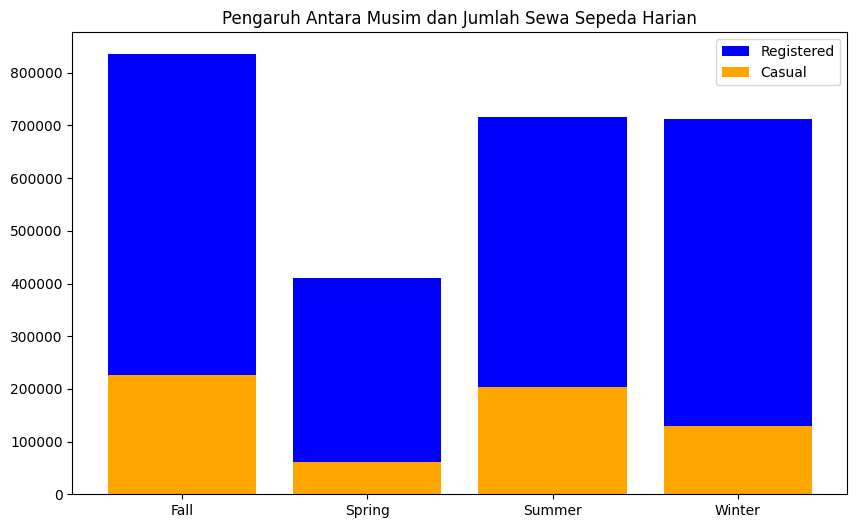

In [26]:
x = df_day.groupby('season').sum(numeric_only=True).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(
    x['season'],
    x['registered'],
    label='Registered',
    color='blue'
)

plt.bar(
    x['season'],
    x['casual'],
    label='Casual',
    color='orange'
)

plt.title('Pengaruh Antara Musim dan Jumlah Sewa Sepeda Harian')

plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara cuaca(weathersit) dan jumlah sewa sepeda harian ?

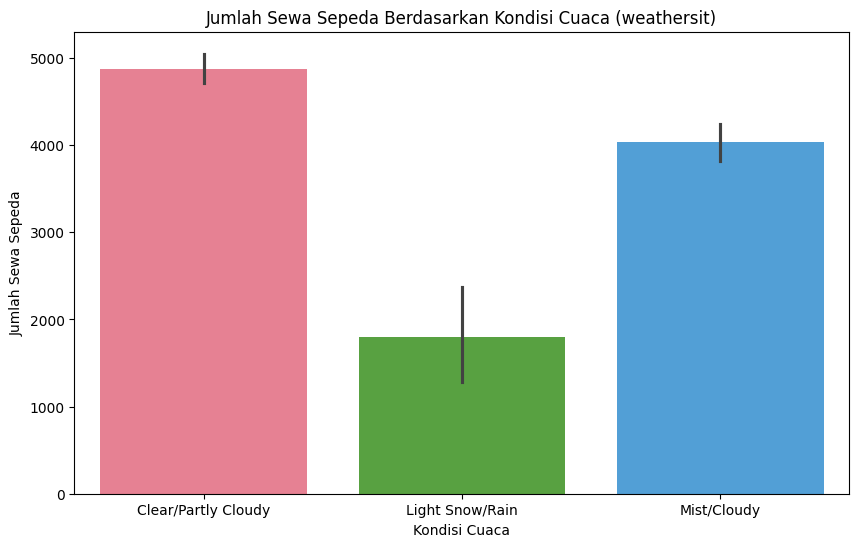

In [27]:
colors = sns.color_palette('husl', len(df_day['weathersit'].unique()))

plt.figure(figsize=(10, 6))
sns.barplot(
    x='weathersit',
    y='count',
    data=df_day,
    palette=colors,
    hue='weathersit',
    legend=False
)
plt.title('Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca (weathersit)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sewa Sepeda')
plt.show()


### Pertanyaan 3: Bagaimana pola penyewaan sepeda berdasarkan waktu(bulan) ?

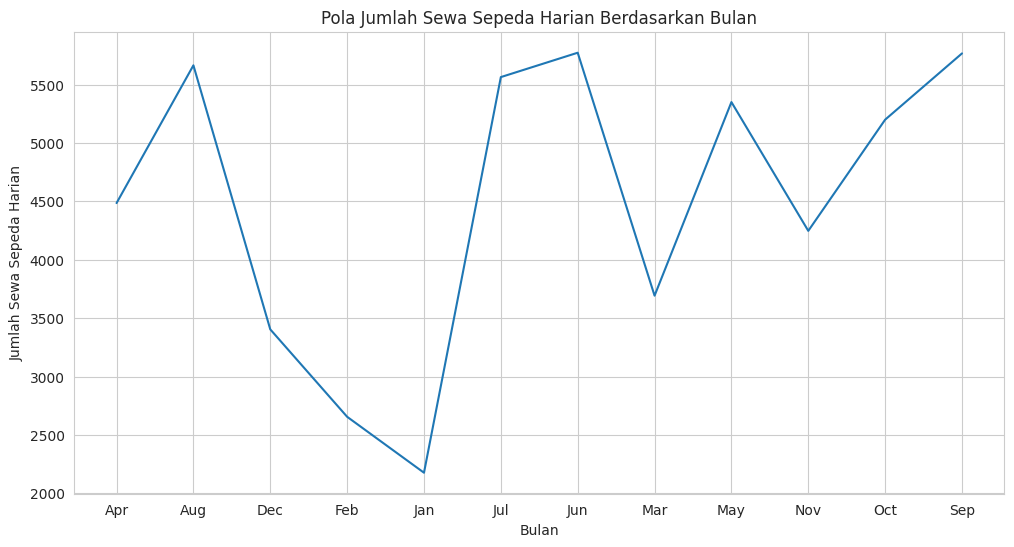

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="count", data=df_day, errorbar=None)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

### Pertanyaan 4: Bagaimana pola penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)?


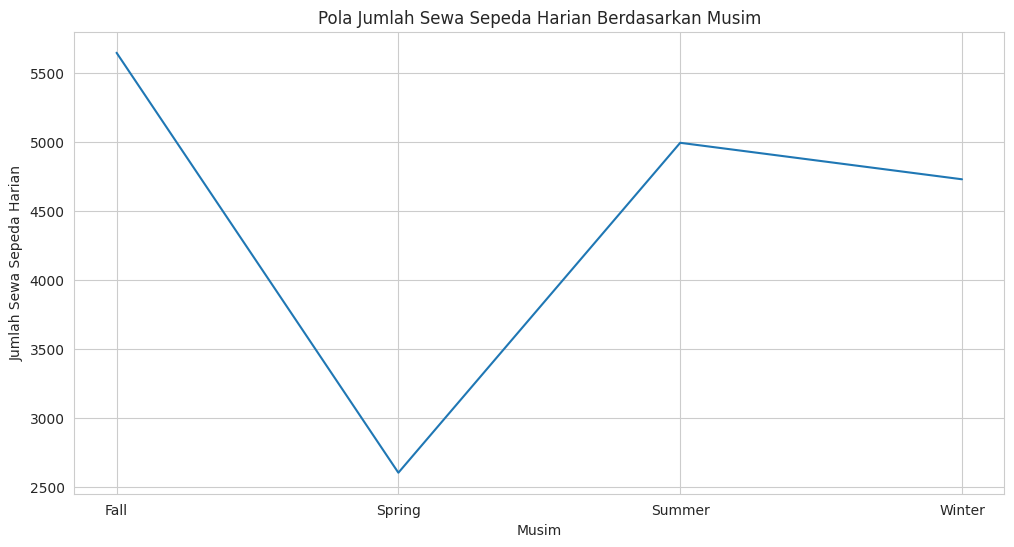

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="season", y="count", data=df_day, errorbar=None)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

## Conclusion

- pertanyaan 1 :
  Jumlah sewa sepeda tertinggi tercatat pada saat musim gugur(fall) dan jumlah sewa tertinggi kedua  tercatat pada saat musim panas(summer). Kita dapat simpulkan bahwa pada musim gugur dan musim panas adalah iklim yang paling cocok untuk bersepeda. Dan jumlah sewa sepeda terendah tercatat pada musim gugur(spring).

- pertanyaan 2 :
  Terlihat jelas dari visualisasi data yang sudah dibuat diatas, bahwa jumlah penyewa sepeda terbanyak tercatat pada saat kondisi cuaca cerah berawan(Clear/Partly Cloudy), sangat sedikit jumlah penyewa sepeda pada saat kondisi cuaca kabut, salju ringan atau hujan lebat. Hal ini dikarenakan kodisi cuaca seperti itu dapat meningkatkan kemungkinan kecelakaan di jalan raya karena jarak pandang yang rendah dan jalan yang licin, jarang sekali orang memilih untuk mengendarai sepeda disaat kondisi cuaca seperti itu.

- pertanyaan 3 :    
  Dari visualisasi data yang dibuat diatas, bahwa jumlah penyewa sepeda terbanyak tercatat pada bulan juni(Jun). Pada bulan juni ini bertepatan pada musim panas (summer). Dan jumlah penyewa sepeda tersedikit tercatat pada bulan Januari(Jan). Pada bulan januari ini bertepatan pada musim dingin. Kondisi jalanan menjadi licin dan hal itu berbahaya bagi pengendara sepeda. Karena hal tersebutlah membuat jumlah penyewa sepeda pada bulan januari(Jan) menjadi sedikit.

- Pertanyaan 4 :    
  Secara keseluruhan, analisis grafik menunjukkan bahwa musim gugur (fall) memiliki tingkat aktivitas penyewaan tertinggi, baik oleh pengguna casual maupun pengguna terdaftar (registered). Pengguna casual menunjukkan puncak aktivitas pada musim gugur dengan lebih dari 1,200 penyewaan, sementara pengguna terdaftar mencapai puncak tertinggi dengan hampir 4,500 penyewaan sepeda. Musim panas juga menunjukkan tingkat aktivitas yang signifikan di kedua kelompok pengguna, diikuti oleh musim dingin. Meskipun musim semi memiliki jumlah penyewaan yang lebih rendah, tetapi masih memberikan kontribusi yang signifikan. Secara umum, musim gugur tetap menjadi musim yang paling diminati oleh pengguna dalam hal penyewaan sepeda. Perbedaan antara kedua jenis pengguna relatif konsisten, di mana pengguna terdaftar (registered) mendominasi sepanjang musim. Informasi ini dapat membantu penyedia layanan untuk menyesuaikan strategi pemasaran, manajemen inventaris, dan pelayanan sesuai dengan preferensi pengguna selama setiap musim.

In [31]:
pip freeze > requirements.txt